# 分类和标注词汇

1. 什么是词汇分类，在自然语言处理中它们是如何使用？

2. 一个好的存储词汇和它们的分类的 Python 数据结构是什么？

3. 我们如何自动标注文本中词汇的词类？

序列标注、N-gram 模型、回退和评估

将词汇按它们的词性（parts-of-speech，POS）分类以及相应的标注它们的过程被称为词

性标注（part-of-speech tagging, POS tagging）或干脆简称标注。

词性也称为词类或词汇范畴。用于特定任务的标记的集合被称为一个标记集。我

们在本章的重点是利用标记和自动标注文本

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("And now for something completely different")

## 词性标注

In [3]:
nltk.pos_tag(text)#词性标注

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

pos_tag:

之后的很多工作都需要标注完的词汇。nltk自带英文标注器pos_tag

在这里我们看到 and 是 CC，并列连词；now 和 completely 是 RB，副词；for 是 IN，介

词；something 是 NN，名词；different 是 JJ，形容词

In [5]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())#上下文关联词
text.similar('woman')

man time day year car moment world family house country child boy
state job way war girl place word work


In [7]:
text.similar('brought')

made found said had got left put told took used asked set is was taken
in given gave saw held


## 标注语料库

In [8]:
# 表示已经标注的标识符:nltk.tag.str2tuple('word/类型') 
# 批量标注
text = "The/AT grand/JJ is/VBD ."
print([nltk.tag.str2tuple(t) for t in text.split()])

[('The', 'AT'), ('grand', 'JJ'), ('is', 'VBD'), ('.', None)]


## 获取已标注的语料库

In [9]:
#读取已经标注的语料库
# nltk语料库ue肚脐提供了统一接口，可以不必理会不同的文件格式。格式:语料库.tagged_word()/tagged_sents()。参数可以指定categories和fields
print(nltk.corpus.brown.tagged_words())

[(u'The', u'AT'), (u'Fulton', u'NP-TL'), ...]


In [13]:
#“通用标记集“
nltk.corpus.brown.tagged_words(tagset='universal')

[(u'The', u'DET'), (u'Fulton', u'NOUN'), ...]

In [12]:
nltk.corpus.brown.tagged_sents()

[[(u'The', u'AT'), (u'Fulton', u'NP-TL'), (u'County', u'NN-TL'), (u'Grand', u'JJ-TL'), (u'Jury', u'NN-TL'), (u'said', u'VBD'), (u'Friday', u'NR'), (u'an', u'AT'), (u'investigation', u'NN'), (u'of', u'IN'), (u"Atlanta's", u'NP$'), (u'recent', u'JJ'), (u'primary', u'NN'), (u'election', u'NN'), (u'produced', u'VBD'), (u'``', u'``'), (u'no', u'AT'), (u'evidence', u'NN'), (u"''", u"''"), (u'that', u'CS'), (u'any', u'DTI'), (u'irregularities', u'NNS'), (u'took', u'VBD'), (u'place', u'NN'), (u'.', u'.')], [(u'The', u'AT'), (u'jury', u'NN'), (u'further', u'RBR'), (u'said', u'VBD'), (u'in', u'IN'), (u'term-end', u'NN'), (u'presentments', u'NNS'), (u'that', u'CS'), (u'the', u'AT'), (u'City', u'NN-TL'), (u'Executive', u'JJ-TL'), (u'Committee', u'NN-TL'), (u',', u','), (u'which', u'WDT'), (u'had', u'HVD'), (u'over-all', u'JJ'), (u'charge', u'NN'), (u'of', u'IN'), (u'the', u'AT'), (u'election', u'NN'), (u',', u','), (u'``', u'``'), (u'deserves', u'VBZ'), (u'the', u'AT'), (u'praise', u'NN'), (u'and'

## 通用词性标记集

已标注的语料库使用许多不同的标记集约定来标注词汇。

categories='news', tagset='universal'

In [14]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [15]:
print brown_news_tagged

[(u'The', u'DET'), (u'Fulton', u'NOUN'), ...]


In [18]:
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[(u'NOUN', 30654),
 (u'VERB', 14399),
 (u'ADP', 12355),
 (u'.', 11928),
 (u'DET', 11389),
 (u'ADJ', 6706),
 (u'ADV', 3349),
 (u'CONJ', 2717),
 (u'PRON', 2535),
 (u'PRT', 2264),
 (u'NUM', 2166),
 (u'X', 92)]

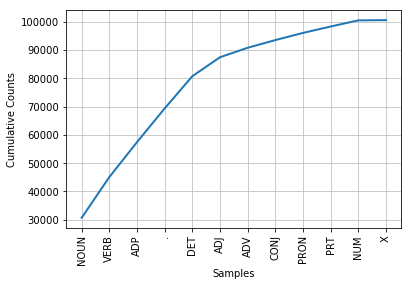

In [19]:
tag_fd.plot(cumulative=True)

In [20]:
wsj = nltk.corpus.treebank.tagged_words()

In [21]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

In [25]:
list(cfd2['VBN'])

[u'limited',
 u'reorganized',
 u'managed',
 u'switched',
 u'caused',
 u'founded',
 u'assembled',
 u'concerned',
 u'contained',
 u'Rekindled',
 u'automated',
 u'bribed',
 u'voted',
 u'issued',
 u'cluttered',
 u'disapproved',
 u'sent',
 u'returned',
 u'synchronized',
 u'puzzled',
 u'desired',
 u'engineered',
 u'headlined',
 u'centralized',
 u'advised',
 u'stabbed',
 u'continued',
 u'perceived',
 u'presented',
 u'prolonged',
 u'Related',
 u'solved',
 u'noted',
 u'concluded',
 u'Filmed',
 u'infringed',
 u'construed',
 u'licensed',
 u'knitted',
 u'slowed',
 u'enclosed',
 u'replicated',
 u'estimated',
 u'imported',
 u'risen',
 u'assisted',
 u'beaten',
 u'contributed',
 u'expressed',
 u'enjoyed',
 u'industrialized',
 u'zoomed',
 u'crossed',
 u'learned',
 u'filled',
 u'told',
 u'drafted',
 u'deemed',
 u'kicked',
 u'led',
 u'ranged',
 u'slated',
 u'reported',
 u'focused',
 u'auctioned',
 u'crippled',
 u'represented',
 u'scrapped',
 u'invented',
 u'obtained',
 u'colored',
 u'skyrocketed',
 u'inv

In [29]:
print cfd2['VBN'].keys()

[u'limited', u'reorganized', u'managed', u'switched', u'caused', u'founded', u'assembled', u'concerned', u'contained', u'Rekindled', u'automated', u'bribed', u'voted', u'issued', u'cluttered', u'disapproved', u'sent', u'returned', u'synchronized', u'puzzled', u'desired', u'engineered', u'headlined', u'centralized', u'advised', u'stabbed', u'continued', u'perceived', u'presented', u'prolonged', u'Related', u'solved', u'noted', u'concluded', u'Filmed', u'infringed', u'construed', u'licensed', u'knitted', u'slowed', u'enclosed', u'replicated', u'estimated', u'imported', u'risen', u'assisted', u'beaten', u'contributed', u'expressed', u'enjoyed', u'industrialized', u'zoomed', u'crossed', u'learned', u'filled', u'told', u'drafted', u'deemed', u'kicked', u'led', u'ranged', u'slated', u'reported', u'focused', u'auctioned', u'crippled', u'represented', u'scrapped', u'invented', u'obtained', u'colored', u'skyrocketed', u'involved', u'changed', u'funded', u'expedited', u'Founded', u'diagnosed', u

## 尝试找出每个名词类型中最频繁的名词

In [30]:
def findtag(tag_prefix,tagged_text):
    cfd = nltk.ConditionalFreqDist((tag,word) for (word,tag) in tagged_text if tag.startswith(tag_prefix))
    return dict((tag,list(cfd[tag].keys())[:5]) for tag in cfd.conditions())

In [31]:
tagdict = findtag('NN',nltk.corpus.brown.tagged_words(categories="news"))

In [32]:
for tag in sorted(tagdict):
    print(tag,tagdict[tag])

(u'NN', [u'inning', u'pardon', u'sunbonnet', u'temperament', u'hitch'])
(u'NN$', [u"junior's", u"player's", u"wife's", u"layman's", u"coach's"])
(u'NN$-HL', [u"Golf's", u"Navy's"])
(u'NN$-TL', [u"House's", u"Art's", u"University's", u"U.'s", u"Department's"])
(u'NN-HL', [u'son', u'help', u'show', u'lack', u'rest'])
(u'NN-NC', [u'eva', u'ova', u'aya'])
(u'NN-TL', [u'Communisn', u'Communism', u'Secretary-General', u'Monthly', u'Self'])
(u'NN-TL-HL', [u'City', u'Commissioner', u'Grove', u'House', u'Oak'])
(u'NNS', [u'wetlands', u'hats', u'facilities', u'woods', u'$12.50'])
(u'NNS$', [u"steelmakers'", u"taxpayers'", u"teammates'", u"bishops'", u"owners'"])
(u'NNS$-HL', [u"Dealers'", u"Idols'"])
(u'NNS$-TL', [u"Officers'", u"States'", u"Bombers'", u"Falcons'", u"Princes'"])
(u'NNS-HL', [u'years', u'idols', u'Creations', u'thanks', u'centers'])
(u'NNS-TL', [u'Arms', u'Gables', u'Broncos', u'Hills', u'Workers'])
(u'NNS-TL-HL', [u'Nations'])


## 探索已经标注的语料库

nltk.bigrams()和nltk.trigrams()，分别对应2-gram模型和3-gram模型。

In [33]:
#设我们正在研究词often，想看看它是如何在文本中使用的。我们可以试着看看跟在often后面的词汇
brown_learned_text = brown.words(categories='learned')

In [34]:
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[u',',
 u'.',
 u'accomplished',
 u'analytically',
 u'appear',
 u'apt',
 u'associated',
 u'assuming',
 u'became',
 u'become',
 u'been',
 u'began',
 u'call',
 u'called',
 u'carefully',
 u'chose',
 u'classified',
 u'colorful',
 u'composed',
 u'contain',
 u'differed',
 u'difficult',
 u'encountered',
 u'enough',
 u'equate',
 u'extremely',
 u'found',
 u'happens',
 u'have',
 u'ignored',
 u'in',
 u'involved',
 u'more',
 u'needed',
 u'nightly',
 u'observed',
 u'of',
 u'on',
 u'out',
 u'quite',
 u'represent',
 u'responsible',
 u'revamped',
 u'seclude',
 u'set',
 u'shortened',
 u'sing',
 u'sounded',
 u'stated',
 u'still',
 u'sung',
 u'supported',
 u'than',
 u'to',
 u'when',
 u'work']

In [39]:
#使用tagged_words()方法查看跟随词的词性标记可能更有指导性：
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']#b[1]词性，b[0]词汇

In [40]:
list(tags)

[u'ADJ',
 u'ADV',
 u'VERB',
 u'VERB',
 u'ADJ',
 u'.',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'.',
 u'VERB',
 u'ADP',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'ADP',
 u'ADV',
 u'PRT',
 u'VERB',
 u'VERB',
 u'ADV',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'ADP',
 u'.',
 u'ADP',
 u'VERB',
 u'VERB',
 u'ADV',
 u'VERB',
 u'ADV',
 u'ADJ',
 u'ADP',
 u'ADV',
 u'VERB',
 u'ADJ',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'ADV',
 u'VERB',
 u'VERB',
 u'ADJ',
 u'VERB',
 u'ADP',
 u'ADP',
 u'ADV',
 u'VERB',
 u'.',
 u'PRT',
 u'VERB',
 u'VERB',
 u'VERB',
 u'VERB',
 u'ADJ',
 u'VERB',
 u'VERB',
 u'VERB']

In [41]:
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [42]:
'''
接下来，让我们看一些较大范围的上下文，找出涉及特定标记和词序列的词（在这种情况下，"<Verb> to <Verb>"）。
在code-three-word-phrase中，我们考虑句子中的每个三词窗口[1]，检查它们是否符合我们的标准[2]。
如果标记匹配，我们输出对应的词[3]
'''
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
    # 动词+TO+动词
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [43]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

(u'combined', u'to', u'achieve')
(u'continue', u'to', u'place')
(u'serve', u'to', u'protect')
(u'wanted', u'to', u'wait')
(u'allowed', u'to', u'place')
(u'expected', u'to', u'become')
(u'expected', u'to', u'approve')
(u'expected', u'to', u'make')
(u'intends', u'to', u'make')
(u'seek', u'to', u'set')
(u'like', u'to', u'see')
(u'designed', u'to', u'provide')
(u'get', u'to', u'hear')
(u'expects', u'to', u'tell')
(u'expected', u'to', u'give')
(u'prefer', u'to', u'pay')
(u'required', u'to', u'obtain')
(u'permitted', u'to', u'teach')
(u'designed', u'to', u'reduce')
(u'Asked', u'to', u'elaborate')
(u'got', u'to', u'go')
(u'raised', u'to', u'pay')
(u'scheduled', u'to', u'go')
(u'cut', u'to', u'meet')
(u'needed', u'to', u'meet')
(u'hastened', u'to', u'add')
(u'found', u'to', u'prevent')
(u'continue', u'to', u'insist')
(u'compelled', u'to', u'make')
(u'made', u'to', u'remove')
(u'revamped', u'to', u'give')
(u'want', u'to', u'risk')
(u'appear', u'to', u'spark')
(u'fails', u'to', u'consider')
(u'p

(u'hoped', u'to', u'peddle')
(u'intended', u'to', u'insure')
(u'decided', u'to', u'provide')
(u'expected', u'to', u'go')
(u'expected', u'to', u'sign')
(u'like', u'to', u'eat')
(u'like', u'to', u'talk')
(u'ceased', u'to', u'grumble')
(u'tending', u'to', u'bid')
(u'start', u'to', u'pay')
(u'failed', u'to', u'measure')
(u'going', u'to', u'take')
(u'needed', u'to', u'push')
(u'trying', u'to', u'get')
(u'try', u'to', u'get')
(u'want', u'to', u'increase')
(u'wants', u'to', u'bring')
(u'threaten', u'to', u'strike')
(u'begun', u'to', u'grow')
(u'combine', u'to', u'serve')
(u'helping', u'to', u'strengthen')
(u'designed', u'to', u'promote')
(u'threatening', u'to', u'expand')
(u'seeks', u'to', u'get')
(u'begin', u'to', u'see')
(u'continue', u'to', u'expand')
(u'failing', u'to', u'render')
(u'decided', u'to', u'tackle')
(u'expects', u'to', u'sign')
(u'tends', u'to', u'become')
(u'came', u'to', u'understand')
(u'deserve', u'to', u'breathe')
(u'advised', u'to', u'seek')
(u'attempting', u'to', u'make

(u'trying', u'to', u'create')
(u'made', u'to', u'appear')
(u'failed', u'to', u'make')
(u'seemed', u'to', u'deserve')
(u'managed', u'to', u'mix')
(u'want', u'to', u'hurt')
(u'liked', u'to', u'nip')
(u'manages', u'to', u'acquire')
(u'widened', u'to', u'enchant')
(u'serve', u'to', u'contradict')
(u'dare', u'to', u'experiment')
(u'tried', u'to', u'humanize')
(u'tries', u'to', u'preserve')
(u'helps', u'to', u'rebut')
(u'seems', u'to', u'make')
(u'began', u'to', u'play')
(u'cares', u'to', u'remember')
(u'serve', u'to', u'show')
(u'want', u'to', u'collect')
(u'designed', u'to', u'invite')
(u'attempt', u'to', u'make')
(u'designed', u'to', u'belong')
(u'seem', u'to', u'come')
(u'wanted', u'to', u'identify')
(u'neglect', u'to', u'cultivate')
(u'chooses', u'to', u'lead')
(u'chosen', u'to', u'sing')
(u'expected', u'to', u'follow')
(u'formed', u'to', u'spur')
(u'tends', u'to', u'shy')
(u'seeking', u'to', u'become')
(u'tries', u'to', u'make')
(u'began', u'to', u'change')
(u'try', u'to', u'solve')
(u

(u'plan', u'to', u'buy')
(u'going', u'to', u'need')
(u'continue', u'to', u'reduce')
(u'needed', u'to', u'arrive')
(u'done', u'to', u'correct')
(u'cost', u'to', u'make')
(u'settled', u'to', u'find')
(u'grew', u'to', u'fulfill')
(u'attempted', u'to', u'restrict')
(u'conceived', u'to', u'affirm')
(u'prefer', u'to', u'believe')
(u'tried', u'to', u'refashion')
(u'begin', u'to', u'fear')
(u'linger', u'to', u'haunt')
(u'disciplined', u'to', u'serve')
(u'trained', u'to', u'fulfill')
(u'organized', u'to', u'furnish')
(u'continued', u'to', u'paint')
(u'made', u'to', u'weave')
(u'try', u'to', u'place')
(u'hesitate', u'to', u'add')
(u'seemed', u'to', u'emphasize')
(u'mean', u'to', u'project')
(u'wishes', u'to', u'convey')
(u'beginning', u'to', u'learn')
(u'start', u'to', u'study')
(u'said', u'to', u'start')
(u'wished', u'to', u'get')
(u'Try', u'to', u'push')
(u'taken', u'to', u'see')
(u'promises', u'to', u'open')
(u'selected', u'to', u'operate')
(u'used', u'to', u'measure')
(u'employed', u'to', u'

(u'allowed', u'to', u'warm')
(u'wishes', u'to', u'entertain')
(u'allowed', u'to', u'stand')
(u'refused', u'to', u'accept')
(u'wished', u'to', u'continue')
(u'persuaded', u'to', u'accept')
(u'decided', u'to', u'charge')
(u'decided', u'to', u'go')
(u'allowed', u'to', u'see')
(u'agreed', u'to', u'take')
(u'decide', u'to', u'send')
(u'allowed', u'to', u'delay')
(u'request', u'to', u'leave')
(u'promised', u'to', u'treat')
(u'declined', u'to', u'enter')
(u'added', u'to', u'reinforce')
(u'obliged', u'to', u'publish')
(u'continue', u'to', u'serve')
(u'plans', u'to', u'serve')
(u'Hoping', u'to', u'cut')
(u'obliged', u'to', u'announce')
(u'wish', u'to', u'preserve')
(u'heard', u'to', u'remark')
(u'hopes', u'to', u'redress')
(u'desires', u'to', u'walk')
(u'prefer', u'to', u'take')
(u'likes', u'to', u'measure')
(u'proposed', u'to', u'corral')
(u'intended', u'to', u'stay')
(u'ceased', u'to', u'look')
(u'manages', u'to', u'overlook')
(u'troubled', u'to', u'read')
(u'destined', u'to', u'go')
(u'expec

(u'needed', u'to', u'explain')
(u'required', u'to', u'make')
(u'sought', u'to', u'make')
(u'accustomed', u'to', u'think')
(u'come', u'to', u'look')
(u'undertook', u'to', u'give')
(u'came', u'to', u'study')
(u'bound', u'to', u'go')
(u'tried', u'to', u'dazzle')
(u'got', u'to', u'know')
(u'presumed', u'to', u'address')
(u'obliged', u'to', u'defend')
(u'coming', u'to', u'spend')
(u'learned', u'to', u'write')
(u'obliged', u'to', u'send')
(u'began', u'to', u'trail')
(u'began', u'to', u'fly')
(u'tried', u'to', u'calm')
(u'inspired', u'to', u'complete')
(u'began', u'to', u'talk')
(u'compelled', u'to', u'spend')
(u'expected', u'to', u'carry')
(u'tend', u'to', u'make')
(u'liked', u'to', u'think')
(u'trying', u'to', u'emulate')
(u'wanted', u'to', u'know')
(u'seemed', u'to', u'remember')
(u'asked', u'to', u'yield')
(u'made', u'to', u'look')
(u'begun', u'to', u'lose')
(u'failed', u'to', u'learn')
(u'wanted', u'to', u'take')
(u'writing', u'to', u'devote')
(u'vowed', u'to', u'kneel')
(u'hoping', u'to

(u'needed', u'to', u'establish')
(u'designed', u'to', u'give')
(u'remain', u'to', u'preserve')
(u'gathered', u'to', u'thank')
(u'continue', u'to', u'protect')
(u'amended', u'to', u'read')
(u'construed', u'to', u'alter')
(u'required', u'to', u'correlate')
(u'amended', u'to', u'read')
(u'directed', u'to', u'make')
(u'directed', u'to', u'establish')
(u'continued', u'to', u'display')
(u'required', u'to', u'move')
(u'planned', u'to', u'furnish')
(u'agreed', u'to', u'submit')
(u'initiated', u'to', u'resolve')
(u'found', u'to', u'exist')
(u'taken', u'to', u'isolate')
(u'modified', u'to', u'reduce')
(u'tending', u'to', u'separate')
(u'established', u'to', u'gather')
(u'used', u'to', u'study')
(u'used', u'to', u'measure')
(u'used', u'to', u'calculate')
(u'directed', u'to', u'mail')
(u'offers', u'to', u'pay')
(u'promises', u'to', u'pay')
(u'construed', u'to', u'limit')
(u'directed', u'to', u'pay')
(u'directed', u'to', u'cover')
(u'failed', u'to', u'offer')
(u'intends', u'to', u'pursue')
(u'helpi

(u'surprised', u'to', u'find')
(u'struggle', u'to', u'induce')
(u'asked', u'to', u'learn')
(u'prefer', u'to', u'test')
(u'told', u'to', u'purchase')
(u'seemed', u'to', u'antagonize')
(u'designed', u'to', u'develop')
(u'refused', u'to', u'change')
(u'refused', u'to', u'change')
(u'refused', u'to', u'accept')
(u'supposed', u'to', u'know')
(u'working', u'to', u'become')
(u'led', u'to', u'see')
(u'asked', u'to', u'vote')
(u'duplicated', u'to', u'form')
(u'learn', u'to', u'play')
(u'want', u'to', u'change')
(u'learns', u'to', u'become')
(u'began', u'to', u'emerge')
(u'used', u'to', u'annoy')
(u'stooping', u'to', u'dispense')
(u'come', u'to', u'see')
(u'preferred', u'to', u'keep')
(u'used', u'to', u'give')
(u'came', u'to', u'feel')
(u'used', u'to', u'accomplish')
(u'found', u'to', u'match')
(u'required', u'to', u'store')
(u'saved', u'to', u'represent')
(u'saved', u'to', u'represent')
(u'created', u'to', u'accommodate')
(u'inspected', u'to', u'determine')
(u'used', u'to', u'look')
(u'serve', 

(u'designed', u'to', u'discover')
(u'seems', u'to', u'use')
(u'used', u'to', u'describe')
(u'postulated', u'to', u'explain')
(u'used', u'to', u'support')
(u'seem', u'to', u'corroborate')
(u'wants', u'to', u'hear')
(u'comes', u'to', u'represent')
(u'used', u'to', u'accompany')
(u'seems', u'to', u'symbolize')
(u'begins', u'to', u'appear')
(u'begins', u'to', u'ramble')
(u'help', u'to', u'set')
(u'calculated', u'to', u'put')
(u'decided', u'to', u'write')
(u'seemed', u'to', u'open')
(u'combine', u'to', u'create')
(u'learned', u'to', u'use')
(u'began', u'to', u'take')
(u'wanted', u'to', u'tell')
(u'wanted', u'to', u'substitute')
(u'want', u'to', u'make')
(u'come', u'to', u'determine')
(u'begun', u'to', u'ebb')
(u'intended', u'to', u'incorporate')
(u'led', u'to', u'postulate')
(u'hope', u'to', u'discover')
(u'tended', u'to', u'emphasize')
(u'fails', u'to', u'explore')
(u'seeks', u'to', u'make')
(u'helping', u'to', u'define')
(u'trying', u'to', u'avoid')
(u'trying', u'to', u'get')
(u'made', u'

(u'going', u'to', u'kill')
(u'like', u'to', u'tell')
(u'want', u'to', u'see')
(u'get', u'to', u'come')
(u'like', u'to', u'dance')
(u'like', u'to', u'dance')
(u'wanted', u'to', u'believe')
(u'trying', u'to', u'put')
(u'started', u'to', u'say')
(u'Forgot', u'to', u'get')
(u'started', u'to', u'say')
(u'trying', u'to', u'make')
(u'want', u'to', u'sit')
(u'trying', u'to', u'get')
(u'want', u'to', u'lease')
(u'wanted', u'to', u'shadow')
(u'trying', u'to', u'make')
(u'tried', u'to', u'shadow')
(u'going', u'to', u'join')
(u'try', u'to', u'keep')
(u'like', u'to', u'run')
(u'wanted', u'to', u'case')
(u'going', u'to', u'join')
(u'wanted', u'to', u'hang')
(u'go', u'to', u'pick')
(u'began', u'to', u'back')
(u'paused', u'to', u'feel')
(u'decided', u'to', u'risk')
(u'turned', u'to', u'face')
(u'began', u'to', u'feel')
(u'started', u'to', u'sweep')
(u'startled', u'to', u'find')
(u'meant', u'to', u'convey')
(u'going', u'to', u'leave')
(u'returning', u'to', u'seek')
(u'bother', u'to', u'look')
(u'try', 

(u'want', u'to', u'put')
(u'hoped', u'to', u'catch')
(u'went', u'to', u'look')
(u'wanting', u'to', u'unlock')
(u'amazed', u'to', u'see')
(u'refused', u'to', u'give')
(u'tried', u'to', u'lift')
(u'forced', u'to', u'agree')
(u'fails', u'to', u'substantiate')
(u'wants', u'to', u'see')
(u'beginning', u'to', u'get')
(u'continued', u'to', u'smile')
(u'turned', u'to', u'add')
(u'wanted', u'to', u'get')
(u'continued', u'to', u'snort')
(u'started', u'to', u'reach')
(u'beginning', u'to', u'recover')
(u'going', u'to', u'talk')
(u'like', u'to', u'kill')
(u'going', u'to', u'hear')
(u'wanted', u'to', u'hear')
(u'came', u'to', u'investigate')
(u'managed', u'to', u'duck')
(u'began', u'to', u'focus')
(u'trying', u'to', u'yank')
(u'began', u'to', u'snort')
(u'wanted', u'to', u'show')
(u'tried', u'to', u'start')
(u'going', u'to', u'let')
(u'going', u'to', u'fight')
(u'attempting', u'to', u'speak')
(u'longing', u'to', u'catch')
(u'rejoicing', u'to', u'think')
(u'like', u'to', u'get')
(u'tried', u'to', u'g

(u'trying', u'to', u'say')
(u'trying', u'to', u'say')
(u'started', u'to', u'say')
(u'wants', u'to', u'take')
(u'started', u'to', u'take')
(u'began', u'to', u'fascinate')
(u'left', u'to', u'spend')
(u'seemed', u'to', u'work')
(u'work', u'to', u'grow')
(u'trying', u'to', u'talk')
(u'lied', u'to', u'shorten')
(u'trying', u'to', u'make')
(u'wanted', u'to', u'force')
(u'refused', u'to', u'take')
(u'seemed', u'to', u'please')
(u'grew', u'to', u'depend')
(u'meant', u'to', u'tell')
(u'trying', u'to', u'pull')
(u'seemed', u'to', u'shiver')
(u'trying', u'to', u'remember')
(u'worked', u'to', u'recall')
(u'wished', u'to', u'call')
(u'seemed', u'to', u'stare')
(u'began', u'to', u'tremble')
(u'refusing', u'to', u'think')
(u'refusing', u'to', u'think')
(u'hoping', u'to', u'frighten')
(u'wanted', u'to', u'run')
(u'began', u'to', u'ache')
(u'began', u'to', u'bother')
(u'tried', u'to', u'take')
(u'wanted', u'to', u'kill')
(u'stopped', u'to', u'see')
(u'going', u'to', u'tell')
(u'going', u'to', u'push')


## 自动标注

最简单的标注器是为每个标识符分配统一标记。下面就是一个将所有词都变成NN的标注器。并且用evaluate()进行检验。
当很多词语是名词时候，它有利于第一次分析并提高稳定性。

In [44]:
brown_tagged_sents = brown.tagged_sents(categories='news')

In [55]:
print brown_tagged_sents

[[(u'The', u'AT'), (u'Fulton', u'NP-TL'), (u'County', u'NN-TL'), (u'Grand', u'JJ-TL'), (u'Jury', u'NN-TL'), (u'said', u'VBD'), (u'Friday', u'NR'), (u'an', u'AT'), (u'investigation', u'NN'), (u'of', u'IN'), (u"Atlanta's", u'NP$'), (u'recent', u'JJ'), (u'primary', u'NN'), (u'election', u'NN'), (u'produced', u'VBD'), (u'``', u'``'), (u'no', u'AT'), (u'evidence', u'NN'), (u"''", u"''"), (u'that', u'CS'), (u'any', u'DTI'), (u'irregularities', u'NNS'), (u'took', u'VBD'), (u'place', u'NN'), (u'.', u'.')], [(u'The', u'AT'), (u'jury', u'NN'), (u'further', u'RBR'), (u'said', u'VBD'), (u'in', u'IN'), (u'term-end', u'NN'), (u'presentments', u'NNS'), (u'that', u'CS'), (u'the', u'AT'), (u'City', u'NN-TL'), (u'Executive', u'JJ-TL'), (u'Committee', u'NN-TL'), (u',', u','), (u'which', u'WDT'), (u'had', u'HVD'), (u'over-all', u'JJ'), (u'charge', u'NN'), (u'of', u'IN'), (u'the', u'AT'), (u'election', u'NN'), (u',', u','), (u'``', u'``'), (u'deserves', u'VBZ'), (u'the', u'AT'), (u'praise', u'NN'), (u'and'

In [45]:
brown_sents = brown.sents(categories='news')

In [56]:
print brown_sents

[[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.'], [u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.'], ...]


In [46]:
#默认标注
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

u'NN'

In [48]:
raw = 'I do not like eggs and ham, I do not like them Sam I am'

In [49]:
tokens = nltk.word_tokenize(raw)#分词
default_tagger = nltk.DefaultTagger('NN')#创建默认标注器
print(default_tagger.tag(tokens)) # 调用tag()方法进行标注

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN')]


In [52]:
print(default_tagger.evaluate(brown_tagged_sents))

0.130894842572



默认的标注器给每一个单独的词分配标记，即使是之前从未遇到过的词。碰巧的是，一

旦我们处理了几千词的英文文本之后，大多数新词都将是名词。正如我们将看到的，这意味

着，默认标注器可以帮助我们提高语言处理系统的稳定性。我们将很快回来讲述这个


In [53]:
# 正则表达式标注器
'''
这里规则是固定（由自己决定）。当规则越来越完善的时候，精确度越高。
'''
patterns = [
    (r'.*ing$','VBG'),
    (r'.*ed$','VBD'),
    (r'.*es$','VBZ'),
    (r'.*','NN')#为了方便，只有少量规则
]

In [54]:
regexp_tagger = nltk.RegexpTagger(patterns)#创建正则表达式标注器

In [61]:
regexp_tagger.tag(brown_sents[3])

[(u'``', 'NN'),
 (u'Only', 'NN'),
 (u'a', 'NN'),
 (u'relative', 'NN'),
 (u'handful', 'NN'),
 (u'of', 'NN'),
 (u'such', 'NN'),
 (u'reports', 'NN'),
 (u'was', 'NN'),
 (u'received', 'VBD'),
 (u"''", 'NN'),
 (u',', 'NN'),
 (u'the', 'NN'),
 (u'jury', 'NN'),
 (u'said', 'NN'),
 (u',', 'NN'),
 (u'``', 'NN'),
 (u'considering', 'VBG'),
 (u'the', 'NN'),
 (u'widespread', 'NN'),
 (u'interest', 'NN'),
 (u'in', 'NN'),
 (u'the', 'NN'),
 (u'election', 'NN'),
 (u',', 'NN'),
 (u'the', 'NN'),
 (u'number', 'NN'),
 (u'of', 'NN'),
 (u'voters', 'NN'),
 (u'and', 'NN'),
 (u'the', 'NN'),
 (u'size', 'NN'),
 (u'of', 'NN'),
 (u'this', 'NN'),
 (u'city', 'NN'),
 (u"''", 'NN'),
 (u'.', 'NN')]

In [57]:
regexp_tagger.evaluate(brown_tagged_sents)

0.15642341428486187

In [70]:
# 查询标注器
'''
很多高频词没有 NN 标记。让我们找出 100 个最频繁的词，存储它们最有可能的标记。
然后我们可以使用这个信息作为“查找标注器”（NLTK UnigramTagger）的模型：
'''
fd = nltk.FreqDist(brown.words(categories='news'))
dict(fd)

{u'sunbonnet': 1,
 u'Elevated': 1,
 u'narcotic': 2,
 u'four': 73,
 u'woods': 4,
 u'railing': 1,
 u'Until': 5,
 u'aggression': 1,
 u'marching': 2,
 u'increase': 24,
 u'eligible': 4,
 u'electricity': 1,
 u'$25-a-plate': 1,
 u'wheeled': 2,
 u'Casey': 6,
 u'all-county': 1,
 u'Belgians': 20,
 u'Western': 7,
 u'dependency': 2,
 u'1959-60': 1,
 u'Duhagon': 1,
 u'sinking': 1,
 u'1,119': 1,
 u'co-operation': 1,
 u'Famed': 1,
 u'regional': 2,
 u'Charitable': 1,
 u'appropriation': 2,
 u'yellow': 3,
 u'Old': 11,
 u'Heights': 1,
 u'bringing': 2,
 u'Policies': 2,
 u'prize': 5,
 u'Loen': 1,
 u'Publique': 2,
 u'wooden': 1,
 u'Loeb': 1,
 u'specialties': 1,
 u'Sands': 1,
 u'succession': 1,
 u'Paul': 6,
 u'shows': 4,
 u'commented': 7,
 u'Screw': 1,
 u'charter': 15,
 u'Oslo': 5,
 u'tired': 3,
 u'pulse': 1,
 u'tires': 3,
 u'271': 1,
 u'second': 35,
 u'273': 1,
 u'Pampa': 2,
 u'DiVarco': 1,
 u'errors': 8,
 u'Initially': 1,
 u'Lucille': 2,
 u'boogie': 1,
 u'contributed': 5,
 u'Seekonk': 2,
 u'Hamilton': 2,
 

In [71]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
dict(cfd)

{u'sunbonnet': FreqDist({u'NN': 1}),
 u'Elevated': FreqDist({u'VBN-TL': 1}),
 u'narcotic': FreqDist({u'JJ': 1, u'NN': 1}),
 u'four': FreqDist({u'CD': 73}),
 u'woods': FreqDist({u'NNS': 4}),
 u'railing': FreqDist({u'NN': 1}),
 u'Until': FreqDist({u'CS': 3, u'IN': 2}),
 u'aggression': FreqDist({u'NN': 1}),
 u'marching': FreqDist({u'VBG': 2}),
 u'increase': FreqDist({u'NN': 15, u'VB': 8, u'VB-HL': 1}),
 u'eligible': FreqDist({u'JJ': 4}),
 u'electricity': FreqDist({u'NN': 1}),
 u'$25-a-plate': FreqDist({u'NN': 1}),
 u'wheeled': FreqDist({u'VBD': 2}),
 u'Casey': FreqDist({u'NP': 6}),
 u'all-county': FreqDist({u'JJ': 1}),
 u'Belgians': FreqDist({u'NPS': 20}),
 u'Western': FreqDist({u'JJ-TL': 7}),
 u'dependency': FreqDist({u'NN': 2}),
 u'1959-60': FreqDist({u'CD': 1}),
 u'Duhagon': FreqDist({u'NP': 1}),
 u'sinking': FreqDist({u'VBG': 1}),
 u'1,119': FreqDist({u'CD': 1}),
 u'co-operation': FreqDist({u'NN': 1}),
 u'Famed': FreqDist({u'JJ': 1}),
 u'regional': FreqDist({u'JJ': 2}),
 u'Charitable'

In [84]:
most_freq_words = fd.most_common(100)# 找出100个最频繁的词
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [85]:
print most_freq_words

[(u'the', 5580), (u',', 5188), (u'.', 4030), (u'of', 2849), (u'and', 2146), (u'to', 2116), (u'a', 1993), (u'in', 1893), (u'for', 943), (u'The', 806), (u'that', 802), (u'``', 732), (u'is', 732), (u'was', 717), (u"''", 702), (u'on', 657), (u'at', 598), (u'with', 545), (u'be', 526), (u'by', 497), (u'as', 481), (u'he', 451), (u'said', 402), (u'his', 399), (u'will', 389), (u'it', 363), (u'from', 344), (u'are', 328), (u';', 314), (u'has', 300), (u'an', 300), (u'--', 300), (u'had', 279), (u'who', 268), (u'have', 265), (u'not', 254), (u'Mrs.', 253), (u'were', 252), (u'this', 250), (u'would', 244), (u'which', 244), (u'their', 219), (u'been', 212), (u'they', 205), (u'He', 191), (u'one', 184), (u'I', 179), (u'its', 174), (u'but', 174), (u'or', 173), (u'more', 171), (u')', 171), (u'Mr.', 170), (u'up', 168), (u'(', 168), (u'all', 163), (u'last', 161), (u'out', 161), (u'two', 157), (u':', 149), (u'other', 149), (u'new', 148), (u'first', 143), (u'year', 138), (u'than', 138), (u'A', 137), (u'about', 1

In [86]:
# 使用上面这个信息作为"查找标注器"
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [79]:
#回退标注模式
# 使用信息作为标注器，如果没有找到就使用默认标注器。这个过程称为"回退"
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [87]:
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [92]:
sent = brown.sents(categories='news')[3]

In [93]:
print sent

[u'``', u'Only', u'a', u'relative', u'handful', u'of', u'such', u'reports', u'was', u'received', u"''", u',', u'the', u'jury', u'said', u',', u'``', u'considering', u'the', u'widespread', u'interest', u'in', u'the', u'election', u',', u'the', u'number', u'of', u'voters', u'and', u'the', u'size', u'of', u'this', u'city', u"''", u'.']


In [94]:
baseline_tagger.tag(sent)

[(u'``', u'``'),
 (u'Only', None),
 (u'a', u'AT'),
 (u'relative', None),
 (u'handful', None),
 (u'of', u'IN'),
 (u'such', None),
 (u'reports', None),
 (u'was', u'BEDZ'),
 (u'received', None),
 (u"''", u"''"),
 (u',', u','),
 (u'the', u'AT'),
 (u'jury', None),
 (u'said', u'VBD'),
 (u',', u','),
 (u'``', u'``'),
 (u'considering', None),
 (u'the', u'AT'),
 (u'widespread', None),
 (u'interest', None),
 (u'in', u'IN'),
 (u'the', u'AT'),
 (u'election', None),
 (u',', u','),
 (u'the', u'AT'),
 (u'number', None),
 (u'of', u'IN'),
 (u'voters', None),
 (u'and', u'CC'),
 (u'the', u'AT'),
 (u'size', None),
 (u'of', u'IN'),
 (u'this', u'DT'),
 (u'city', None),
 (u"''", u"''"),
 (u'.', u'.')]

In [95]:
#我们把所有这些放在一起，写一个程序来创建和评估具有一定范围的查找标注器
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))
def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

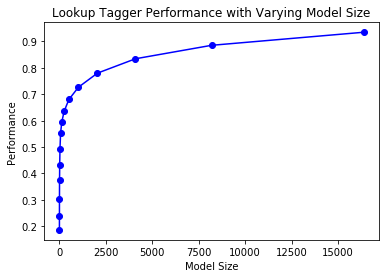

In [96]:
display()

### 评估

使用黄金标准测试数据。一个已经手动标注并作为自动系统评估标准而被接收的语料库。

如果标注器对词的标记与黄金标准标记相同，那么标注器就被认为是正确的。当然这只是相对于黄金标准这个测试数据而言。

关于开发一个已标注的语料库，这是一个庞大的任务，其中涉及到了许多方面。

可以通过nltk.app.concordance()来可视化查找某个语料库中某个单词的词性

## N-garm标注

In [97]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [98]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size+1:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8120007987220448

NgramTagger 类使用一个已标注的训练语料库来确定对每个上下文哪个词性标记最

有可能。在这里，我们看到一个 n-gram 标注器的特殊情况，即一个 bigram 标注器。首先，

我们训练它，然后用它来标注未标注的句子：

In [99]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[(u'Various', u'JJ'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'apartments', u'NNS'),
 (u'are', u'BER'),
 (u'of', u'IN'),
 (u'the', u'AT'),
 (u'terrace', u'NN'),
 (u'type', u'NN'),
 (u',', u','),
 (u'being', u'BEG'),
 (u'on', u'IN'),
 (u'the', u'AT'),
 (u'ground', u'NN'),
 (u'floor', u'NN'),
 (u'so', u'CS'),
 (u'that', u'CS'),
 (u'entrance', u'NN'),
 (u'is', u'BEZ'),
 (u'direct', u'JJ'),
 (u'.', u'.')]

In [100]:
bigram_tagger.evaluate(test_sents)

0.10253594249201278

当 n 越大，上下文的特异性就会增加，我们要标注的数据中包含训练数据中不存在的上

下文的几率也增大。这被称为数据稀疏问题，在 NLP 中是相当普遍的。因此，我们的研究

结果的精度和覆盖范围之间需要有一个权衡（这与信息检索中的精度/召回权衡有关）。

注意！

N-gram 标注器不应考虑跨越句子边界的上下文。因此，NLTK 的标注器被

设计用于句子链表，一个句子是一个词链表。在一个句子的开始，tn-1和前

面的标记被设置为 None。


In [103]:
'''
解决精度和覆盖范围之间的权衡的一个办法是尽可能的使用更精确的算法，但却在很多
时候落后于具有更广覆盖范围的算法。例如：我们可以按如下方式组合 bigram 标注器、uni
gram 标注器和一个默认标注器：
'''
#组合标注器
'''
思路：
1. 尝试使用 bigram 标注器标注标识符。
2. 如果 bigram 标注器无法找到一个标记，尝试 unigram 标注器。
3. 如果 unigram 标注器也无法找到一个标记，使用默认标注器。
利用回退标注器。
'''
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

In [104]:
t2.evaluate(test_sents)

0.8449480830670927

In [107]:
'''
很多时候，覆盖范围更广的算法比精度更高的算法更有用。
利用backoff指明回退标注器,来实现标注器的组合。
而参数cutoff显式声明为int型，则会自动丢弃只出现1-n次的上下文。
'''
t3 = nltk.BigramTagger(train_sents, cutoff=1, backoff=t1)

In [108]:
t3.evaluate(test_sents)

0.8428514376996805

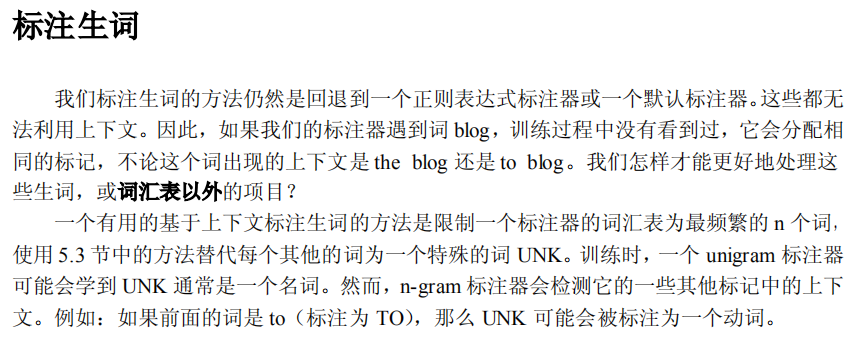

In [110]:
#存储标注器
'''
在大语料库上训练一个标注器可能需要大量的时间。没有必要在每次我们需要的时候训
练一个标注器，很容易将一个训练好的标注器保存到一个文件以后重复使用。
'''
from pickle import dump
output = open('t3.pkl', 'wb')
dump(t3, output, -1)
output.close()

In [111]:
# 存储标注器调用见day4末尾

n-gram标注器的问题

    模型大小与标注器性能之前的平衡关系。如果使用回退标注器n-gram可能存储trigram和bigram表，这将会是很大的稀疏矩阵。
    
    使用上下文中的词的其他特征作为条件标记是不切实际的。

In [120]:
#基于转换的标注 Brill标注，一种归纳标注方法，它的性能很好，使用的模型只有n-gram标注器的很小一部分
'''
Brill标注是一种基于转换的学习，以它的发明者命名。一般的想法很简单：猜每个词的标记，然后返回和修复错误。
在这种方式中，Brill标注器陆续将一个不良标注的文本转换成一个更好的。与n-gram标注一样，这是有监督的学习方法，
因为我们需要已标注的训练数据来评估标注器的猜测是否是一个错误。
然而，不像n-gram标注，它不计数观察结果，只编制一个转换修正规则列表。
'''
from nltk.tag import brill
# brill.nltkdemo18plus()
brill.nltkdemo18()

[Template(Pos([-1])),
 Template(Pos([1])),
 Template(Pos([-2])),
 Template(Pos([2])),
 Template(Pos([-2, -1])),
 Template(Pos([1, 2])),
 Template(Pos([-3, -2, -1])),
 Template(Pos([1, 2, 3])),
 Template(Pos([-1]),Pos([1])),
 Template(Word([-1])),
 Template(Word([1])),
 Template(Word([-2])),
 Template(Word([2])),
 Template(Word([-2, -1])),
 Template(Word([1, 2])),
 Template(Word([-3, -2, -1])),
 Template(Word([1, 2, 3])),
 Template(Word([-1]),Word([1]))]

LSTM 自动标记 ，记忆长度长 ，N-gram优化